Mean Absolute Error: 5.695900644269291
Mean Squared Error: 56.16559421500603
Root Mean Squared Error: 7.494370835167288
R-squared Score: 0.8975640982991402


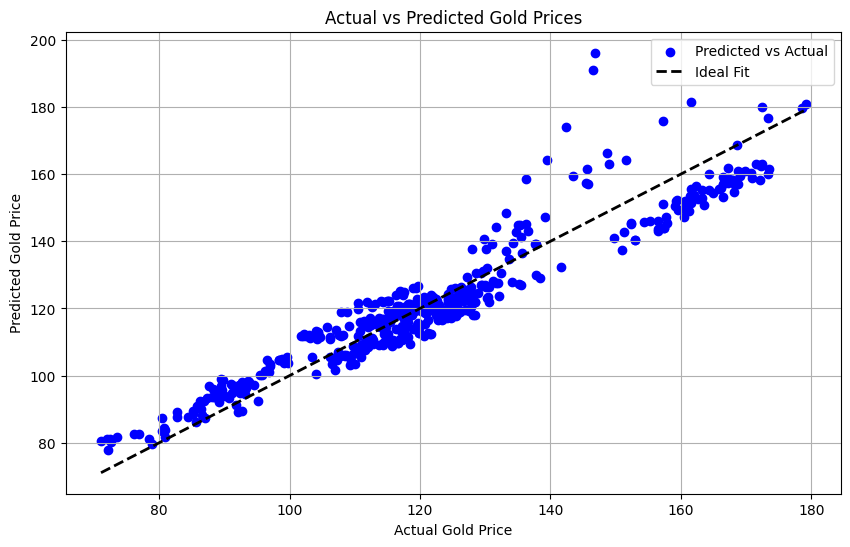

Predicted Gold Price: [[95.59908228]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("./gld_price_data.csv")


X = data.iloc[:, [1, 3, 4, 5]].values
y = data.iloc[:, [2]].values


data.dropna(inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gold Price')
plt.ylabel('Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()


spx = float(input("Enter SPX value: "))
uso = float(input("Enter USO value: "))
slv = float(input("Enter SLV value: "))
eur_usd = float(input("Enter EUR/USD value: "))

input_data = np.array([[spx, uso, slv, eur_usd]])
input_data = scaler.transform(input_data)
prediction = model.predict(input_data)

print("Predicted Gold Price:", prediction)
